In [1]:
import requests
from bs4 import BeautifulSoup
import re
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import matplotlib.pyplot as plt
import warnings
from scipy.spatial.distance import cosine

In [2]:
import codecs
#from sklearn import feature_extraction
import mpld3
import sys
import simplejson
import json
import pickle
import os

In [3]:
#Doc2Vec/Word2vec packages
import nltk
from nltk.tokenize import sent_tokenize
import gensim
from gensim import corpora, models, similarities
import logging
import wikipedia
import random
from gensim.test.test_doc2vec import ConcatenatedDoc2Vec
from nltk.corpus import stopwords
from gensim.models import Doc2Vec, Word2Vec

/Users/markregalla/anaconda/lib/python2.7/site-packages/numpy/lib/utils.py:95: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  warnings.warn(depdoc, DeprecationWarning)
/Users/markregalla/anaconda/lib/python2.7/site-packages/scipy/lib/_util.py:67: DeprecationWarning: Module scipy.linalg.blas.fblas is deprecated, use scipy.linalg.blas instead
  DeprecationWarning)
/Users/markregalla/anaconda/lib/python2.7/site-packages/scipy/lib/_util.py:67: DeprecationWarning: Module scipy.linalg.blas.fblas is deprecated, use scipy.linalg.blas instead
  DeprecationWarning)
/Users/markregalla/anaconda/lib/python2.7/site-packages/scipy/lib/_util.py:67: DeprecationWarning: Module scipy.linalg.blas.fblas is deprecated, use scipy.linalg.blas instead
  DeprecationWarning)
/Users/markregalla/anaconda/lib/python2.7/site-packages/scipy/lib/_util.py:67: DeprecationWarning: Module scipy.linalg.blas.fblas is depr

In [2]:
warnings.filterwarnings('ignore')

##Clean data for modelling

In [13]:
#%%time

TaggedDocument = gensim.models.doc2vec.TaggedDocument
u = 0
model_list = []
paralist = []

#for loop for opening each file in directory for training
for article in os.listdir('/users/markregalla/desktop/metis/Project4/WikiArticlesBackup'):
    
    #Open saved total_corpus file for training
    with open("/users/markregalla/desktop/metis/Project4/WikiArticlesBackup/" 
              + article, "r") as myfile:
        para = myfile.read()
    myfile.close
    
    #Clean
    para = [para]
    para = cleanText(para)
    #paralist.append(para)
    
    #Save cleaned file in same place
    with open("/users/markregalla/desktop/metis/Project4/WikiArticles/" 
              + article, "w") as myfile:
        myfile.write(para)
    myfile.close
    
    #sys.stdout.write("\r" + str(u))   #prints iterator as a status
    u += 1
    if u == 5:
        break

<type 'list'> before lowercasing
<type 'list'> after lowercasing, before removing newlines
<type 'str'> after removing newlines, before removing non-letters
<type 'str'> after removing newlines, before removing non-letters
<type 'str'> after removing non-letters, before removing stopwords
a


TypeError: cannot concatenate 'str' and 'int' objects

In [21]:
stop = stopwords.words('english')
'when' in stop

True

In [ ]:
%%time
paralist = labelizeReviews(paralist, 'Testing')

##Functions for cleaning and labelling text

In [4]:
def page_read(soup):
    #thetext = []
    thetext = ''
    paragraphs = soup.findAll('p') #comment out only when saving wiki articles to disk
    for p in paragraphs:
        #thetext.append(p.text)    #make a list of sentences
        thetext = thetext + p.text + '\n' #make a list with 1 element being the whole document
    #thetext = [thetext]
    #theindex = 0
    #wikidef = paragraphs[theindex].text
    #print thetext
    #print type(thetext)
    return thetext

In [5]:
def cleanText(corpus):
    z = 0
    corpus = [z.lower() for z in corpus]
    corpus = re.sub('\n', ' ', corpus[0])
    #corpus = re.sub('\\[.*?\\]',' ', corpus)
    corpus = " ".join(re.split("[^a-zA-Z.]*", corpus))
    #stop = stopwords.words('english')
    #for word in corpus:
    #    print word
    #    z += 1
    #    if z == 15:
    #        break
    #    if word in stop:
    #        word.replace(word, '')
    
    #treat punctuation as individual words
    #punctuation = """.,?!:;(){}[]"""
    #for c in punctuation:
    #    corpus = [z.replace(c, ' %s '%c) for z in corpus]
    #corpus = [z.split() for z in corpus]
    return corpus

In [175]:
def labelizeReviews(reviews, label_type):
    labelized = []
    for i,v in enumerate(reviews):
        #label = '%s_%s'%(label_type,i)    #iterate sentence labels
        label = '%s_%s'%(label_type,1)     #uniform sentence labels
        labelized.append(TaggedDocument(v, [label]))
    return labelized
    #yield LabeledSentence(words=line.split(), labels=['SENT_%s' % uid])
        #yield gensim.models.doc2vec.LabeledSentence(words=line.split(), tags=['SENT_%s' % uid])

In [ ]:
class LabeledLineSentence(object):
   def __init__(self, filename):
       self.filename = filename
   def __iter__(self):
       for uid, line in enumerate(open(filename)):
           yield gensim.models.doc2vec.TaggedDocument(words=line.split(), tags=['SENT_%s' % uid])

In [10]:
#Julia's version
stop = stopwords.words()

class MySentences2(object):
    def __init__(self, dirname):
           self.dirname = dirname

    def __iter__(self):
        #counter = 0
        for fname in os.listdir(self.dirname):
            for uid, line in enumerate(open(os.path.join(self.dirname, fname))):
                yield gensim.models.doc2vec.TaggedDocument(words=line.split(), tags=['SENT_%s' % uid])
            #counter += 1
            #if counter == 20:
            #    break
            #sys.stdout.write("\r" + str(counter))
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
#my version with regex to remove wikipedia reference numbers
'''
stop = stopwords.words('english')

class MySentences2(object):
    def __init__(self, dirname):
           self.dirname = dirname

    def __iter__(self):
        counter = 0
        for fname in os.listdir(self.dirname):
            print sys.stdout.write("\r" + fname)
            for uid, line in enumerate(open(os.path.join(self.dirname, fname))):
                word = line.lower().split()
                word = re.sub('\\[.*?\\]',' ', word)
                if word not in stop:
                    yield gensim.models.doc2vec.LabeledSentence(word, tags=['SENT_%s' % uid])
            counter += 1
            if counter == 20:
                break
'''

##Modelling

In [11]:
mysentences = MySentences2('/users/markregalla/desktop/metis/Project4/WikiArticles')

In [37]:
%%time
wiki_model = gensim.models.Doc2Vec(mysentences, size=100, window=8, min_count=5, workers=4)

KeyboardInterrupt: 

In [5]:
wiki_model = Doc2Vec.load('/users/markregalla/desktop/metis/Project4/models/model1.d2v')

In [6]:
wiki_model.most_similar(positive='heart')

[('severity', 0.6394526362419128),
 ('mouth', 0.637306272983551),
 ('thickening', 0.6018389463424683),
 ('onset', 0.5980780124664307),
 ('breakdown', 0.5911039113998413),
 ('liver', 0.5804134607315063),
 ('brain', 0.575840175151825),
 ('fate', 0.5756975412368774),
 ('weakness', 0.5728738903999329),
 ('throat', 0.5684252977371216)]

In [4]:
%%time
doc_model = Doc2Vec(size=100, window=8, min_count=5, workers=4)
doc_model.load_word2vec_format('googlenews/GoogleNews-vectors-negative300.bin', binary=True)
doc_model.train(mysentences)

UnpicklingError: invalid load key, '3'.

In [9]:
%%time
#google_model.most_similar(positive='')
google_model.vocab

CPU times: user 7 µs, sys: 2 µs, total: 9 µs
Wall time: 14.1 µs


{'tripolitan': <gensim.models.word2vec.Vocab at 0x1104a9490>,
 'fawn': <gensim.models.word2vec.Vocab at 0x11b06f590>,
 'transjordan.': <gensim.models.word2vec.Vocab at 0x1104a9590>,
 'soestdijk': <gensim.models.word2vec.Vocab at 0x1104a9610>,
 'campari.': <gensim.models.word2vec.Vocab at 0x1104a9690>,
 'nunnery': <gensim.models.word2vec.Vocab at 0x1104a9710>,
 'sowell': <gensim.models.word2vec.Vocab at 0x1104a9790>,
 'utnapishtim': <gensim.models.word2vec.Vocab at 0x1104a9810>,
 'woodn': <gensim.models.word2vec.Vocab at 0x1104a9890>,
 'exodus.': <gensim.models.word2vec.Vocab at 0x1249a8910>,
 'chameleons': <gensim.models.word2vec.Vocab at 0x1104a9910>,
 'clotted': <gensim.models.word2vec.Vocab at 0x1104a9990>,
 'spiders': <gensim.models.word2vec.Vocab at 0x1104a9a10>,
 'paizo': <gensim.models.word2vec.Vocab at 0x1104a9a50>,
 'fabianism': <gensim.models.word2vec.Vocab at 0x1104a9ad0>,
 'semitic': <gensim.models.word2vec.Vocab at 0x124b0a6d0>,
 'woody': <gensim.models.word2vec.Vocab at 0

In [4]:
google_model = Doc2Vec.load('models/google_wiki_model.d2v')

In [40]:
print gensim.__version__

0.12.3


0.0707738982124
0.0708709205188


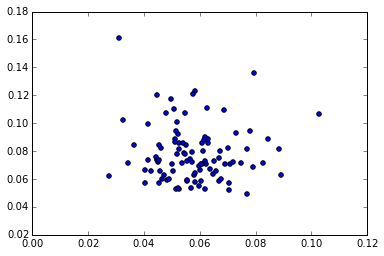

In [39]:
%matplotlib inline
#wiki_model = gensim.models.Doc2Vec(paralist, size=100, window=8, min_count=5, workers=4)

#print all_model.docvecs['Testing_0']
#vec1 = wiki_model['heart']
#vec2 = wiki_model['attack']
#print cosine(vec1, vec2)

problistx = []
problisty = []
for i in range(100):
    vec1 = wiki_model.infer_vector('A heart attack occurs when the flow of blood to the heart is blocked, most often by a build-up of fat, cholesterol and other substances, which form a plaque in the arteries that feed the heart (coronary arteries). The interrupted blood flow can damage or destroy part of the heart muscle.')
    vec2 = wiki_model.infer_vector('More than a million Americans have heart attacks each year. A heart attack, or myocardial infarction (MI), is permanent damage to the heart muscle. "Myo" means muscle, "cardial" refers to the heart, and "infarction" means death of tissue due to lack of blood supply.')
    vec3 = wiki_model.infer_vector('A heart attack is when the nerves that control the heartbeat become infected, generally by a virus, resulting in the death of the muscle tissue.')
    #vec4 = wiki_model.infer_vector('my stomach hurts')
    problistx.append(cosine(vec1, vec2))
    problisty.append(cosine(vec1, vec3))
    #print cosine(vec1, vec4)

print problistx[0]
print problisty[0]
plt.scatter(problistx, problisty)


In [9]:
concat_model = ConcatenatedDoc2Vec([x for x in model_list])
print concat_model.docvecs['Testing_0']

NameError: name 'model_list' is not defined

In [90]:
doc1=["This is a sentence","This is another sentence"]
documents=[doc.strip().split(" ") for doc in doc1 ]
model = gensim.models.Doc2Vec(documents, size = 100, window = 300, min_count = 10, workers=4)

AttributeError: 'list' object has no attribute 'words'

In [93]:
documents = ["Human machine interface for lab abc computer applications",
            "A survey of user opinion of computer system response time",
            "The EPS user interface management system",
            "System and human system engineering testing of EPS",
             "Relation of user perceived response time to error measurement",
             "The generation of random binary unordered trees",
             "The intersection graph of paths in trees",
             "Graph minors IV Widths of trees and well quasi ordering",
             "Graph minors A survey"]
stoplist = set('for a of the and to in'.split())
texts = [[word for word in document.lower().split() if word not in stoplist]
        for document in documents]
model = gensim.models.Doc2Vec(texts, size = 100, window = 300, min_count = 10, workers=4)

AttributeError: 'list' object has no attribute 'words'

In [ ]:
#Sample URLS for testing content
url = ['https://en.wikipedia.org/wiki/Myocardial_infarction',
      'https://en.wikipedia.org/wiki/Blood_flow',
      'https://en.wikipedia.org/wiki/Circulatory_system#Human_cardiovascular_system']

##Pickling

In [8]:
#dump list of good id nos into pickle file
with open('good_id_list5.pkl', 'w') as picklefile:
    pickle.dump(good_id_list, picklefile)
    #pickle.dump(paralist, picklefile)

In [ ]:
#retrieve list of good id nos
with open('good_id_list_1.pkl', 'r') as picklefile:
    good_id_list = pickle.load(picklefile)